In [1]:
import pandas as pd

In [7]:
benin = pd.read_csv('data/benin-malanville.csv')
sierra = pd.read_csv('data/sierraleone-bumbuna.csv')
togo = pd.read_csv('data/togo-dapaong_qc.csv')

In [10]:
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'
# Combine into one DataFrame
df_all = pd.concat([benin, sierra, togo], ignore_index=True)

# Metrics to analyze
metrics = ['GHI', 'DNI', 'DHI']

C:\Users\user\AppData\Local\Temp\ipykernel_5160\278029453.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


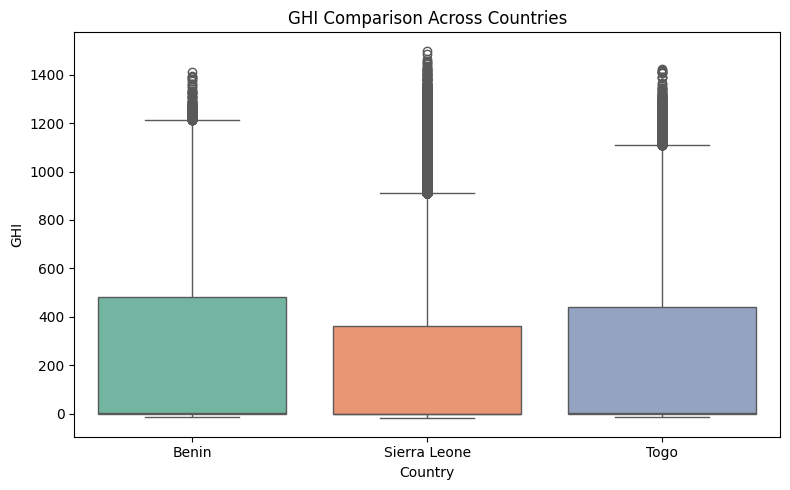

C:\Users\user\AppData\Local\Temp\ipykernel_5160\278029453.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


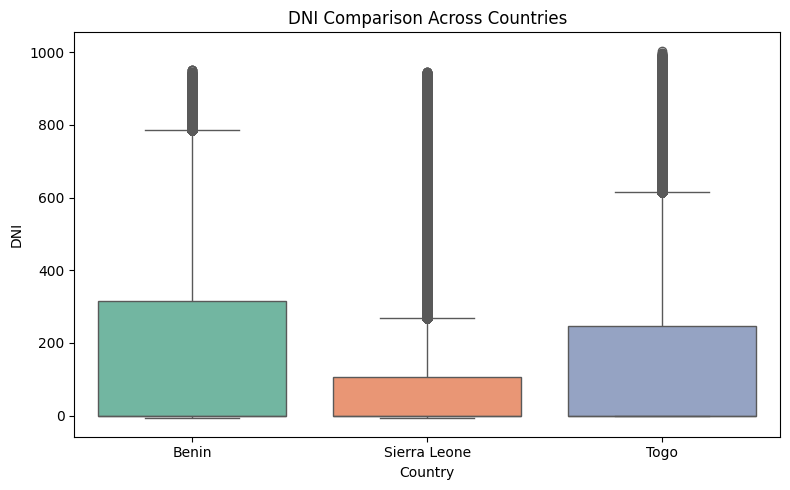

C:\Users\user\AppData\Local\Temp\ipykernel_5160\278029453.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


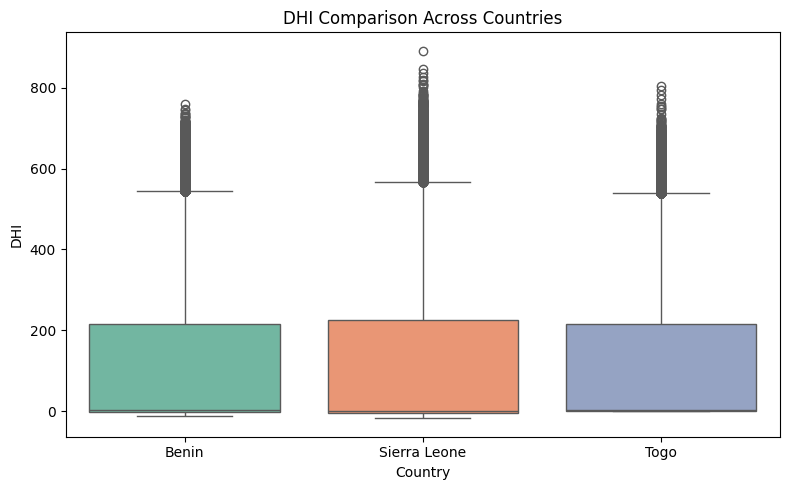

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Boxplots for each metric
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} Comparison Across Countries')
    plt.tight_layout()
    plt.show()

In [13]:
# Summary table
summary = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
display(summary)

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

In [15]:
from scipy.stats import f_oneway

# One-way ANOVA test
f_stat, p_value = f_oneway(
    benin['GHI'].dropna(),
    sierra['GHI'].dropna(),
    togo['GHI'].dropna()
)
print(f"ANOVA p-value for GHI across countries: {p_value:.4f}")


ANOVA p-value for GHI across countries: 0.0000


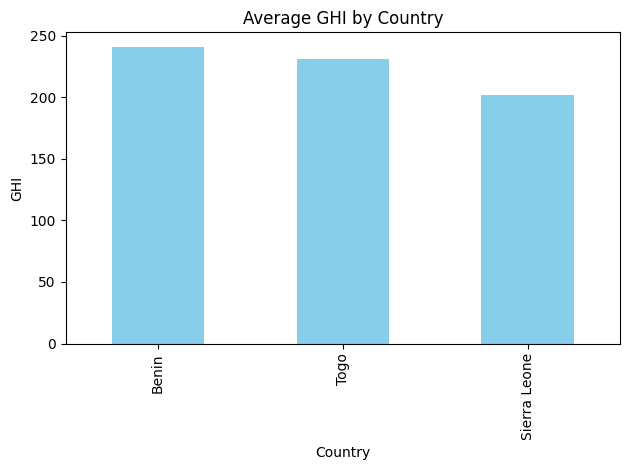

In [16]:
# Bar chart of average GHI
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', color='skyblue', title='Average GHI by Country', ylabel='GHI')
plt.tight_layout()
plt.show()